# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
crypto_amount = {
    "Holding Amount": [1.2, 5.3]
}

# Set the tickers
tickers = ["BTC", "ETH"]

# Create the shares DataFrame with `tickers` as index
df_crypto = pd.DataFrame(crypto_amount, index=tickers)

# Display shares data
df_crypto

,Holding Amount
BTC,1.2
ETH,5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

requests.get(btc_url).json()
requests.get(eth_url).json()

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 116286547,
   'total_supply': 116286547,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2486.23,
     'volume_24h': 27583285541,
     'market_cap': 290169681008,
     'percentage_change_1h': -0.182655854766797,
     'percentage_change_24h': 4.627962527546,
     'percentage_change_7d': -8.30956029261359,
     'percent_change_1h': -0.182655854766797,
     'percent_change_24h': 4.627962527546,
     'percent_change_7d': -8.30956029261359},
    'CAD': {'price': 3022.261188,
     'volume_24h': 33530241903.6396,
     'market_cap': 352730264233.325,
     'percent_change_1h': -0.182655854766797,
     'percent_change_24h': 4.627962527546,
     'percent_change_7d': -8.30956029261359}},
   'last_updated': 1623670157}},
 'metadata': {'timestamp': 1623670157,
  'num_cryptocurrencies': 1290,
  'error': None}}

In [5]:
# Fetch current BTC price
btc = requests.get(btc_url).json()
price_btc= btc['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth = requests.get(eth_url).json()
price_eth= eth['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc=df_crypto.iloc[0,0]
my_eth=df_crypto.iloc[1,0]

my_btc_value=df_crypto.iloc[0,0]*price_btc
my_eth_value=df_crypto.iloc[1,0]*price_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57288.31
The current value of your 5.3 ETH is $16017.98


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
load_dotenv()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stockbond = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
df_stockbond.head(10)

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-06-09 00:00:00-04:00  115.43  115.43  114.97  115.05  3418086  423.18   

                                                             
                             high     low   close    volume  
time                                                         
2021-06-09 00:00:00-04:00  423.26  421.41  421.62  38368598

In [9]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

agg_close_price= float(df_stockbond["AGG"]["close"])
spy_close_price=float(df_stockbond["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.05
Current SPY closing price: $421.62


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $23010.00
The current value of your 50 SPY shares is $21081.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income=12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
df_savings= pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,73306.294856
shares,44091.000000


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='amount'>

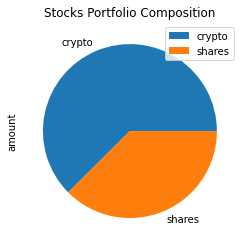

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Stocks Portfolio Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_btc_value + my_eth_value+my_spy_value + my_agg_value

shortfall=emergency_fund-total_savings

# Validate saving health
if total_savings > emergency_fund:
    print(f"congratulations for having enough money in this fund!")
if total_savings == emergency_fund:
    print(f"congratulations on reaching this financial goal.")
if total_savings < emergency_fund:
    print(f"You are ${shortfall:0.2f} away from reaching this financial goal.")   

congratulations for having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker = ["AGG","SPY"]

timeframe = "1D"

df_portfolio_5years = alpaca.get_barset(
    tickers,
    timeframe,
    start= start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_portfolio_5years.head(10)

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2017-06-12 00:00:00-04:00  109.51  109.6958  109.47  109.555  1184601  243.14   
2017-06-13 00:00:00-04:00  109.43  109.6000  109.43  109.580  1324388  243.99   
2017-06-14 00:00:00-04:00  110.00  110.1800  109.85  109.950  2304819  244.86   
2017-06-15 00:00:00-04:00  109.90  109.9000  109.78  109.870  1938779  242.68   
2017-06-16 00:00:00-04:00  109.86  109.9700  109.85  109.945  1709677  242.77   
2017-06-19 00:00:00-04:00  109.87  109.9000  109.74  109.790  1375531  243.59   
2017-06-20 00:00:00-04:00  109.85  110.0300  109.80  109.975  2010628  244.25   
2017-06-21 00:00:00-04:00  109.88  110.0400  109.88  109.980  1085301  243.43   
2017-06-22 00:00:00-04:00  110.06  110.0947  109.95  110.050  1295361  242.97   
2017-06-23 00:00:00-04:00  110.01  110.1085  109.98  110.070  1101304  242.91   

                                                               
                             high       low   close    volume  
time                                                           
2017-06-12 00:00:00-04:00  243.42  242.3800  243.34  57096569  
2017-06-13 00:00:00-04:00  244.61  243.5799  244.52  43470532  
2017-06-14 00:00:00-04:00  244.87  243.2900  244.26  55098826  
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79  51523068  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63  48998243  
2017-06-19 00:00:00-04:00  244.73  243.4800  244.64  42503652  
2017-06-20 00:00:00-04:00  244.26  242.9900  243.04  39203167  
2017-06-21 00:00:00-04:00  243.59  242.4100  242.95  42746920  
2017-06-22 00:00:00-04:00  243.53  242.6400  242.83  32991335  
2017-06-23 00:00:00-04:00  243.51  242.4700  243.16  45792641

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

df_portfolio_5years = MCSimulation(
    portfolio_data = df_portfolio_5years,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [ ]:
# Printing the simulation input data
df_portfolio_5years.portfolio_data.head()

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
df_portfolio_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999776,0.991651,0.996573,1.001117,1.010314,1.000462,0.997399,0.996299,1.005704,0.998865,...,0.999687,0.999208,0.997553,1.000466,1.000737,1.006126,1.002488,0.985731,1.000547,1.010165
2,1.007535,0.981258,0.992052,0.996021,1.007945,1.002285,0.996960,0.998699,1.007290,0.997955,...,1.008805,1.003094,1.005791,0.999094,0.994797,0.998511,1.007330,0.998908,1.002962,1.005596
3,1.010847,0.978922,0.982916,1.004977,1.002415,0.999663,0.998113,1.000246,1.003984,1.002344,...,1.010697,0.989787,1.003981,1.004087,0.995151,1.005454,1.005389,0.987712,0.998826,1.009364
4,0.998575,0.981017,0.985114,0.999372,0.999627,1.007637,0.996173,1.011668,1.002040,0.999961,...,1.014932,0.988066,1.018083,1.007424,0.996115,1.005320,1.008781,0.990887,1.000598,1.010804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.997584,4.125727,4.312820,5.903468,20.761119,6.882264,3.063987,6.719896,4.711290,12.784495,...,9.941563,11.347742,8.079767,4.438929,11.977504,15.479977,14.855059,7.340400,10.635107,4.718429
7557,10.976338,4.143867,4.303678,5.900581,20.587908,6.909469,3.064424,6.738653,4.692341,12.896195,...,9.942716,11.340258,8.131162,4.422496,12.033575,15.481336,14.863289,7.380070,10.680462,4.738056
7558,10.967726,4.178875,4.326528,5.922209,20.655021,6.920086,3.073679,6.822778,4.674661,12.884354,...,9.951745,11.296526,8.172024,4.389433,12.039531,15.452671,14.982262,7.481840,10.700458,4.723235
7559,11.012418,4.195493,4.327527,5.909975,20.824139,6.926578,3.068299,6.786520,4.682438,12.996671,...,10.046046,11.310862,8.226663,4.355114,12.015288,15.586782,15.097054,7.502999,10.579792,4.703247


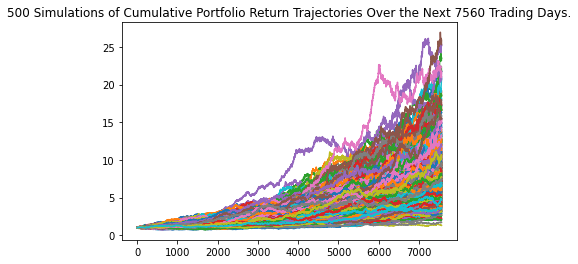

In [20]:
# Plot simulation outcomes
df_portfolio_5years = df_portfolio_5years.plot_simulation()

In [21]:
# Plot probability distribution and confidence intervals


### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'ci_lower' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")